# Scrapping And Analysing Customer Reviews To Uncover Findings for British Airways 

In this notebook, we will be scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights we may uncover.
We will use Python web scraping library - BeautifulSoup to scrape 2000 unique customer reviews from https://www.airlinequality.com/. 

For the analysis, we will conduct a Rule Based sentiment analysis, an approach to analyzing text without training or using machine learning models. Examples of Rule Based sentiment analysis include TextBlob, VADER, SentiWordNet.
We have chosen VADER (Valence Aware Dictionary and sEntiment Reasoner), as the python package for this analysis. Vader is used for sentiment analysis of text which has both the polarities i.e. positive/negative. VADER is used to quantify how much of positive or negative emotion the text has and also the intensity of emotion.


In [1]:
#Install and Import webscraping packages
! pip install requests
from bs4 import BeautifulSoup
import requests


#Import data wrangling and visualization packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns 

#libraries for sentiment analysis
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download([
    'stopwords',
    'punkt',
    'wordnet',
    'omw-1.4',
    'opinion_lexicon',
    'vader_lexicon'
])
plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Scrape data from 20 pages that contain 100 reviews each

base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
reviews = []
pages = 20
# Loop through 20 pages
for i in range(1, pages + 1):
    url = f"{base_url}/page{i}/?sortby=post_date%3ADesc&pagesize=100"
    response = requests.get(url)
    # Parse Contents
    parsed_content = BeautifulSoup(response.content, "html.parser")
    # Append the texts to reviews list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
print(len(reviews))

2000


In [3]:
# Convert reviews to a dataframe  

df = pd.DataFrame()
df["reviews"] = reviews
df["reviews"].tail()

1995    ✅ Verified Review |  Flew British Airways from...
1996    ✅ Verified Review | Flew London Gatwick to Tam...
1997    ✅ Verified Review |  Outbound Heathrow - Frank...
1998    ✅ Verified Review |  Dublin to San Francisco v...
1999    ✅ Verified Review |  Mexico to Amsterdam via L...
Name: reviews, dtype: object

In [4]:
# Clean the dataframe of "✅ Trip Verified |" & "'✅ Verified Review |" as they are not important for the analysis

df["reviews"] = df["reviews"].astype(str).str.strip('✅ Trip Verified |')
df["reviews"] = df["reviews"].astype(str).str.strip('✅ Verified Review |')
df["reviews"] = df["reviews"].astype(str).str.strip('Not Verified |')
df["reviews"] = df["reviews"].apply(str)

In [5]:
# Check Cleaned Dataframe

df["reviews"].head(20)

0     Despite being a gold member, the British Airwa...
1     Regarding the aircraft and seat: The business ...
2     I travelled with British Airways from Sweden t...
3     Food was lousy. Who ever is planning the Asian...
4     Had the worst experience. The flight from Lond...
5     he ground staff were not helpful. Felt like al...
6     Second time BA Premium Economy in a newer airc...
7     They changed our Flights from Brussels to Lond...
8     At Copenhagen the most chaotic ticket counter ...
9     Worst experience of my life trying to deal wit...
10    Due to code sharing with Cathay Pacific I was ...
11    LHR check in was quick at the First Wing and q...
12    I wouldn't recommend British Airways at all. I...
13    Absolutely horrible experience. I booked a tic...
14    This is the worst airline. Not one thing went ...
15    I will never fly British Airways again. To sta...
16    Worst aircraft I have ever flown. The seats we...
17    I enjoyed my flight. The boarding was swif

In [6]:
# Instantiate VADER's sentiment analyzer
sentiment = SentimentIntensityAnalyzer()

In [7]:
# Generate Polarity scores for the reviews
df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['reviews']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['reviews']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['reviews']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['reviews']]

In [8]:
# Inspect dataframe for results

df.head(10)

,reviews,compound,neg,neu,pos
0,"Despite being a gold member, the British Airwa...",-0.8680,0.161,0.781,0.058
1,Regarding the aircraft and seat: The business ...,-0.4541,0.101,0.813,0.086
2,I travelled with British Airways from Sweden t...,-0.9455,0.069,0.903,0.027
3,Food was lousy. Who ever is planning the Asian...,-0.7476,0.110,0.842,0.049
4,Had the worst experience. The flight from Lond...,-0.8604,0.110,0.866,0.023
5,he ground staff were not helpful. Felt like al...,-0.8537,0.166,0.834,0.000
6,Second time BA Premium Economy in a newer airc...,0.9714,0.052,0.677,0.270
7,They changed our Flights from Brussels to Lond...,-0.8055,0.096,0.866,0.038
8,At Copenhagen the most chaotic ticket counter ...,0.1015,0.102,0.756,0.142
9,Worst experience of my life trying to deal wit...,-0.9600,0.152,0.798,0.049


_The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive)._

_The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1, or close to it with float operation). These are the most useful metrics if you want to analyze the context & presentation of how sentiment is conveyed or embedded in rhetoric for a given sentence._

In [9]:
# Conduct Descriptive analysis of the result
df[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.086998,0.083536,0.811913,0.104560
std,0.785339,0.055097,0.072763,0.079436
min,-0.997400,0.000000,0.436000,0.000000
25%,-0.783100,0.044750,0.770000,0.048000
50%,0.250800,0.076000,0.818000,0.087000
75%,0.909950,0.114000,0.863000,0.145000
max,0.999200,0.348000,1.000000,0.490000


_From the results, we can see with median compound score is 0.30 which means that 50% of the reviews have a compound score of more than  0.30, which suggests a positive sentiment._

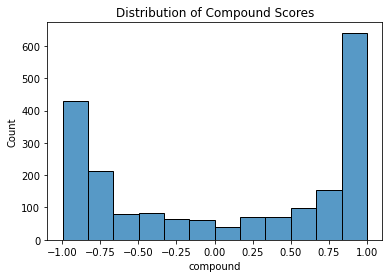

In [10]:
# Visualiziling compound score results

sns.histplot(df['compound'])
plt.title("Distribution of Compound Scores")
plt.savefig("Compound.png");

_The peaks at the extremes suggest that, the are many reviews that are either extremely positive or extremely negative, and there are relatively few moderate and nuetral reviews_

In [11]:
# Classify sentiments as positive, negative and neutral

def compute_sentiment(df):
    if df['compound'] >= 0.05:
        return "Positive"
    elif df['compound'] <= - 0.05:
        return "Negative"
    else:
        return "Neutral"
    
df["sentiment"] = df.apply(compute_sentiment, axis = 1)

df.head()

,reviews,compound,neg,neu,pos,sentiment
0,"Despite being a gold member, the British Airwa...",-0.8680,0.161,0.781,0.058,Negative
1,Regarding the aircraft and seat: The business ...,-0.4541,0.101,0.813,0.086,Negative
2,I travelled with British Airways from Sweden t...,-0.9455,0.069,0.903,0.027,Negative
3,Food was lousy. Who ever is planning the Asian...,-0.7476,0.110,0.842,0.049,Negative
4,Had the worst experience. The flight from Lond...,-0.8604,0.110,0.866,0.023,Negative


_the chart shows the proportions 

In [12]:
df["sentiment"].value_counts(normalize=True)*100

Positive    53.15
Negative    45.30
Neutral      1.55
Name: sentiment, dtype: float64

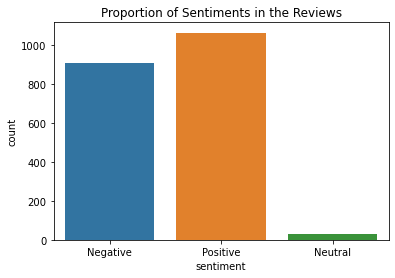

In [13]:
sns.countplot(x=df["sentiment"])
plt.title("Proportion of Sentiments in the Reviews")
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("proportion.png");

_Bar Chart shows a clearly that there are more positive reviews than there are negative ones_




### Creating word clouds for the positive and negative reviews for extract insights 


In [14]:
# Def Stop words
stop_words = nltk.corpus.stopwords.words('english')

#Create a function to preprocess the data for wordcloud visualization
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] # remove and turn to lower case
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # stemming
    return stemmed_text

df["processed_reviews"] = df["reviews"].apply(preprocess_text)

In [15]:
# Subset data
positive_reviews = df.loc[(df["sentiment"]=="Positive"),:]
negative_reviews = df.loc[(df["sentiment"]=="Negative"),:]

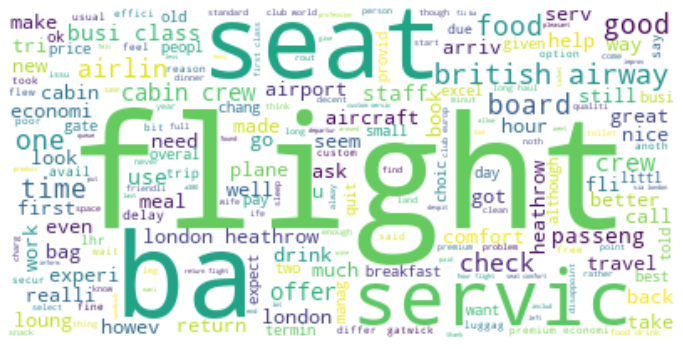

<Figure size 1440x720 with 0 Axes>

In [16]:
pos_tokens = (word for df in positive_reviews["processed_reviews"] for word in df)
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig("positivewc.png")

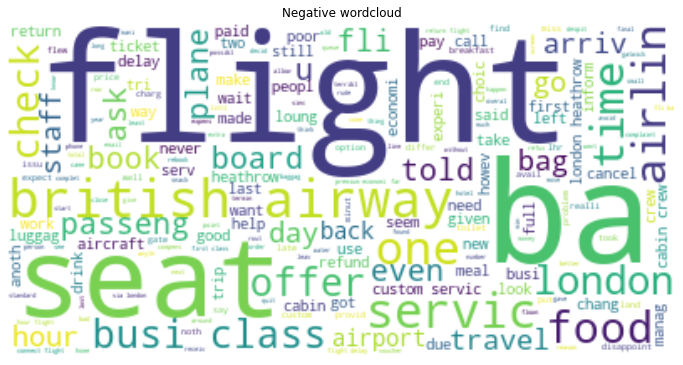

In [17]:
neg_tokens = (word for df in negative_reviews["processed_reviews"] for word in df)

wordcloud1 = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))


plt.figure(figsize=(12,14))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Negative wordcloud')
plt.show()